In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.stats import kstest,ks_2samp
from scipy import signal
from statsmodels.distributions.empirical_distribution import ECDF

In [261]:
data = pd.read_excel('../data/point25.xlsx')

In [262]:
data.head()

,TimeStamp,Channel00,Channel01,Channel02,Channel03,Channel04,Channel05,Channel06,Channel07,Channel08,...,Channel11,Channel12,Channel13,Channel14,Channel15,ClosestFrameTime,X,Y,CacheFileName,CacheFrameNumber
0,131340718913600000,-0.117350,0.585129,-0.016761,-0.014131,0.047668,0.060160,0.058187,0.769871,-0.000654,...,-0.044703,0.052928,-0.041415,-0.000983,4.970945,NaN,NaN,NaN,NaN,NaN
1,131340718913610000,-0.127869,0.610441,-0.016104,-0.010844,0.054900,0.065091,0.077911,0.752120,0.004606,...,-0.046675,0.054900,-0.039772,-0.000325,4.970616,NaN,NaN,NaN,NaN,NaN
2,131340718913620000,-0.127541,0.626548,-0.023664,0.000990,0.063776,0.068049,0.082184,0.603866,0.015782,...,-0.036485,0.051613,-0.043059,0.000004,4.970945,NaN,NaN,NaN,NaN,NaN
3,131340718913630000,-0.121952,0.646929,-0.025308,0.025973,0.075281,0.070679,0.114728,0.386252,0.024987,...,-0.044374,0.047997,-0.045360,0.000004,4.971273,NaN,NaN,NaN,NaN,NaN
4,131340718913640000,-0.112748,0.678486,-0.021692,0.041094,0.087772,0.088101,0.123603,0.129191,0.028274,...,-0.044703,0.047668,-0.044703,-0.002297,4.972588,NaN,NaN,NaN,NaN,NaN


In [263]:
abl_p = data.iloc[:, 12:13]
abl_d = data.iloc[:, 13:14]
cs_p = data.iloc[:, 4:5]
signal_abld = abl_d.values
signal_csp = cs_p.values
signal_ablp = abl_p.values

In [264]:
signal_abld = signal_abld.ravel()
signal_csp = signal_csp.ravel()
signal_ablp = signal_ablp.ravel()

kernal = 11
signal_abld = scipy.signal.medfilt(signal_abld, kernal) 
signal_csp = scipy.signal.medfilt(signal_csp, kernal) 
signal_ablp = scipy.signal.medfilt(signal_ablp, kernal) 

In [265]:
def fft_compare(signal_1, signal_2):
    N = len(signal_1) # Number of sample points
    # T = 0.001  # sample spacing
    T = 0.002
 
    signal_1 = signal_1 - np.mean(signal_1)
    signal_2 = signal_2 - np.mean(signal_2)
    
    fft_1 = fft(signal_1)
    fft_2 = fft(signal_2)
    
    x_axis = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    fft_val_1 = 2 / N * np.abs(fft_1[0: N // 2])
    fft_val_2 = 2 / N * np.abs(fft_2[0: N // 2])
    
    Normalized = 0
    if Normalized:
        fft_val_1 = fft_val_1 / sum(fft_val_1)
        fft_val_2 = fft_val_2 / sum(fft_val_2)
    
    fig = plt.figure(figsize=(12,8))
    plt.subplot(211)
    plt.plot(x_axis, fft_val_1, color='r', label='Abl distal electrode')
    plt.legend(loc="upper right")
    plt.ylabel('Magnitude')
    plt.grid(True)
    #plt.title("Spectral graph")
    plt.subplot(212)
    plt.plot(x_axis, fft_val_2,color='b',label='Cs proximal electrode')
    plt.legend(loc="upper right")
    plt.xlabel('Frequency(HZ)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

    d_stat = ks_test(fft_val_1, fft_val_2)
    print(d_stat)

In [266]:
def ks_test(fft_signal_1, fft_signal_2):
    stat = ks_2samp(fft_signal_1, fft_signal_2)
    ecdf1, ecdf2 = ECDF(fft_signal_1), ECDF(fft_signal_2)
    fig = plt.figure(figsize=(12,8))
    xs = np.linspace(min(fft_signal_1 + fft_signal_2), 
                     max(fft_signal_1 + fft_signal_2), 
                     num=10000)
    #plt.figure(figsize=(12,8))
    plt.plot(xs, ecdf1(xs), xs, ecdf2(xs))
    plt.show()
    return stat

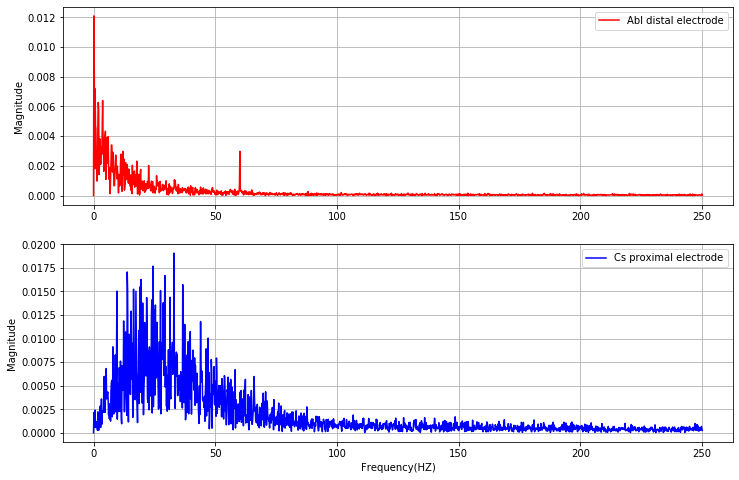

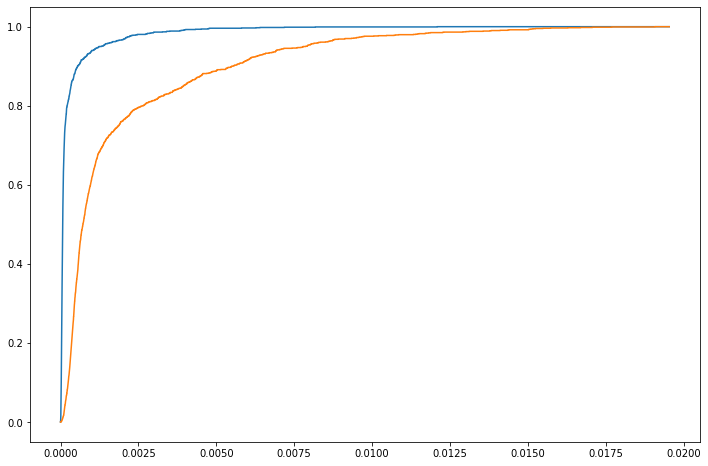

Ks_2sampResult(statistic=0.7259114583333334, pvalue=0.0)


In [267]:
signal_1 = signal_abld[:6144:2]
signal_2 = signal_csp[:6144:2]
fft_compare(signal_1, signal_2)

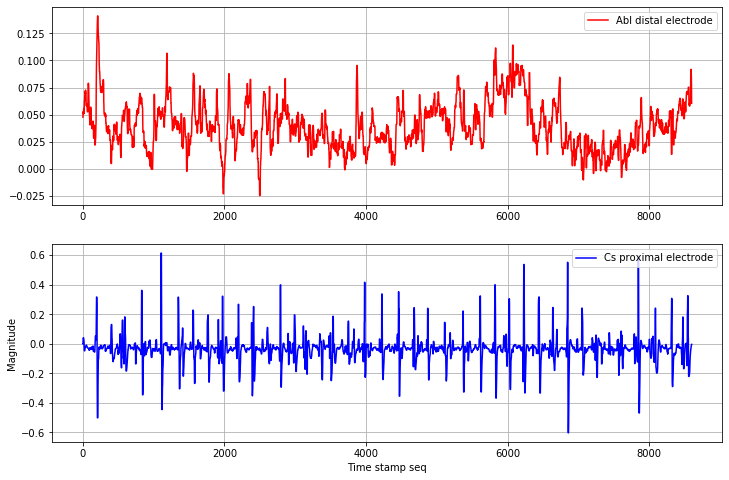

In [268]:
base = np.arange(1, len(signal_ablp)+1, 1) 

fig = plt.figure(figsize=(12,8))
#plt.subplot(311)
#plt.plot(base, signal_ablp,'g-',label = 'Abl proximal electrode')
plt.subplot(211)
plt.plot(base, signal_abld,'r-',label = 'Abl distal electrode')
plt.legend(loc='upper right')
plt.grid(True)
plt.subplot(212)
plt.plot(base, signal_csp,'b-',label = 'Cs proximal electrode')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel('Time stamp seq')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
print("test")